### **Problem Statement**

##### - Predicting each score (Regression)



**Import Libraries**

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor


In [304]:
# # mac
# data = pd.read_csv('/Users/azel/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

#windows
data = pd.read_csv('C:/Users/azelt/OneDrive/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

### **Linear Regression**

Features
- **Parental Level of Education**: Indicates a supportive or resource-rich learning environment
- **Test Preparation Course**: Suggests better preparedness and study habits
- **Lunch**: Better nutrition could affect academic performance???

**Drop target variables and define features**

In [305]:
X = data.drop(columns=['math score', 'reading score', 'writing score'])

**Implementing one-hot encoding on categorical features**

In [306]:
# One-hot encode categorical features
# pd.get_dummies transforms categorical features into one-hot encoded binary columns.
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [307]:
print(X_encoded.head())


   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   parental level of education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                       

**Define Targets (scores)**

In [308]:
y_math = data['math score']
y_reading = data['reading score']
y_writing = data['writing score']

**Split the Data** (Training 80 / Testing 20)

In [309]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(
    X_encoded, y_math, test_size=0.2, random_state=42)

X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(
    X_encoded, y_reading, test_size=0.2, random_state=42)

X_train_writing, X_test_writing, y_train_writing, y_test_writing = train_test_split(
    X_encoded, y_writing, test_size=0.2, random_state=42)



**Initialize and train Linear Regression Models (scores)**

In [310]:
math_model_lr = LinearRegression()
reading_model_lr = LinearRegression()
writing_model_lr = LinearRegression()

math_model_lr.fit(X_train_math, y_train_math)
reading_model_lr.fit(X_train_reading, y_train_reading)
writing_model_lr.fit(X_train_writing, y_train_writing)

LinearRegression()

**Evaluate the Model**

In [311]:
# Predict on the test sets
y_pred_math_lr = math_model_lr.predict(X_test_math)
y_pred_reading_lr = reading_model_lr.predict(X_test_reading)
y_pred_writing_lr = writing_model_lr.predict(X_test_writing)

# Evaluate the models
math_rmse_lr = mean_squared_error(y_test_math, y_pred_math_lr, squared=False)
math_r2_lr = r2_score(y_test_math, y_pred_math_lr)

reading_rmse_lr = mean_squared_error(y_test_reading, y_pred_reading_lr, squared=False)
reading_r2_lr = r2_score(y_test_reading, y_pred_reading_lr)

writing_rmse_lr = mean_squared_error(y_test_writing, y_pred_writing_lr, squared=False)
writing_r2_lr = r2_score(y_test_writing, y_pred_writing_lr)


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Results**

In [312]:
print("Math Score: RMSE =", math_rmse_lr, ", R² =", math_r2_lr)
print("Reading Score: RMSE =", reading_rmse_lr, ", R² =", reading_r2_lr)
print("Writing Score: RMSE =", writing_rmse_lr, ", R² =", writing_r2_lr)

Math Score: RMSE = 14.160185226319358 , R² = 0.17599998338251166
Reading Score: RMSE = 13.79186391872779 , R² = 0.15939617857969446
Writing Score: RMSE = 13.321116741030654 , R² = 0.26373587906757556


==================================================================================================================================================

### **Testing feature engineering**

Combine math score, reading score and writing score to create an average score. This new feature provides an overall indicator of student performance. The model predicts overall performance (average score) without directly using the scores its meant to predict.

In [313]:
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

**Drop target variables and define features**

In [314]:
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average score'])  # Exclude targets

**One-hot Encode**

In [315]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print(X_encoded.head())

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   parental level of education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                       

**Define target variable**

In [316]:
# Define the target variable (average score)
y_performance = data['average score']

**Split the Dataset**

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_performance, test_size=0.2, random_state=42)

**Train the Model using Gradient Boosting**

In [318]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

**Make Predictions & Evaluate the Model**

In [319]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 14.003155439707509
R²: 0.08526611533821282


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Feature Analysis (Importance)**

In [320]:
# Extract feature importances
importances = model.feature_importances_

# Map importances to feature names
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

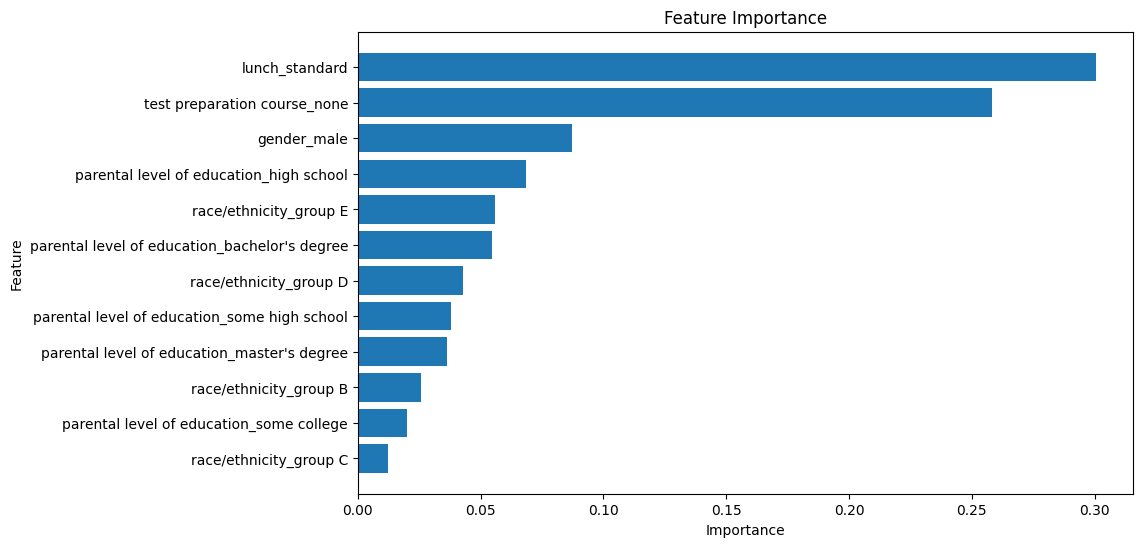

In [321]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

==================================================================================================================================================

### **Refining the Features**

**Filter out low-importance features (e.g., features with importance < 0.05)**

In [322]:
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature']

**Create a refined feature set with only important features**

In [323]:
X_refined = X_encoded[important_features]
print(X_refined)

     lunch_standard  test preparation course_none  gender_male  \
0              True                          True        False   
1              True                         False        False   
2              True                          True        False   
3             False                          True         True   
4              True                          True         True   
..              ...                           ...          ...   
995            True                         False        False   
996           False                          True         True   
997           False                         False        False   
998            True                         False        False   
999           False                          True        False   

     parental level of education_high school  race/ethnicity_group E  \
0                                      False                   False   
1                                      False                   

**Train-test split**

In [324]:
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_refined, y_performance, test_size=0.2, random_state=42)

**Retrain the Gradient Boosting model on refined features**

In [325]:
refined_model = GradientBoostingRegressor(random_state=42)
refined_model.fit(X_train_refined, y_train_refined)

GradientBoostingRegressor(random_state=42)

**Make Predictions & Evaluate** 

In [326]:
# Make predictions
y_pred_refined = refined_model.predict(X_test_refined)

# Evaluate the refined model
refined_rmse = mean_squared_error(y_test_refined, y_pred_refined, squared=False)
refined_r2 = r2_score(y_test_refined, y_pred_refined)

print("RMSE:", refined_rmse)
print("R²:", refined_r2)

RMSE: 14.09353661117503
R²: 0.07341999594838422


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### **Observations**

1. No Improvement - The model's performance remains unchanged even after removing low-importance features.

This suggests that the remaining features already capture most of the variance the model can explain.

==================================================================================================================================================

### **Hyperparameter Tuning**

We can use Grid Search or Randomized Search for hyperparameter optimization:

1. **Grid Search**:

- Exhaustively searches through all combinations of specified hyperparameters.
- Comprehensive but computationally expensive.

2. **Randomized Search**:

- Samples a fixed number of hyperparameter combinations randomly.
- Faster and suitable for large parameter spaces.

### **Key Hyperparameters to Tune**

1. **n_estimators**:

- Number of trees in the ensemble.
- More trees can improve learning but may lead to overfitting if too high.

2. **learning_rate**:

- Controls how much each tree contributes to the final prediction.
- Lower values improve generalization but require more trees.
  
3. **max_depth**:

- Maximum depth of each tree.
- Limits model complexity to prevent overfitting.

4. **min_samples_split and min_samples_leaf**:

- Minimum samples required to split a node or to be a leaf node.
- Controls the granularity of the splits.

5. **subsample**:

- Fraction of samples used for fitting each tree.
- Helps prevent overfitting by introducing randomness.

==================================================================================================================================================

### **RandomizedSearchCV**

**Define the parameter grid for hyperparameter tuning**

In [327]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

**Initialize the Gradient Boosting Model**

In [328]:
gb_model = GradientBoostingRegressor(random_state=42)

**Initialize RandomizedSearchCV**

In [329]:
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,       # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1   # Use all available cores
)

**Perform the hyperparameter search**

In [330]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

**Extract the best parameters**

In [331]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.01}


**Evaluate the best model**

In [332]:
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

**Calculate RMSE and R²**

In [333]:
best_rmse = mean_squared_error(y_test, y_pred_best, squared=False)
best_r2 = r2_score(y_test, y_pred_best)

print("Best Model RMSE:", best_rmse)
print("Best Model R²:", best_r2)

Best Model RMSE: 13.738667080339686
Best Model R²: 0.11949434989127172


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


==================================================================================================================================================

### **RandomForestRegressor**

In [334]:

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R²:", rf_r2)


Random Forest RMSE: 14.776901832099448
Random Forest R²: -0.01861419507194917


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


==================================================================================================================================================

### **XGBoost**

In [335]:

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=5,             # Maximum tree depth
    subsample=0.8,           # Fraction of samples used per tree
    colsample_bytree=0.8     # Fraction of features used per tree
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)

xgb_rmse, xgb_r2
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R²:", xgb_r2)

XGBoost RMSE: 14.574996973187014
XGBoost R²: 0.009031398544841918


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


==================================================================================================================================================

In [337]:


# Initialize individual models
gradient_boosting = GradientBoostingRegressor(random_state=42, **random_search.best_params_)
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)
xgboost = XGBRegressor(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

# Create an ensemble model using VotingRegressor
ensemble_model = VotingRegressor(
    estimators=[
        ('gradient_boosting', gradient_boosting),
        ('random_forest', random_forest),
        ('xgboost', xgboost)
    ]
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_rmse = mean_squared_error(y_test, y_pred_ensemble, squared=False)
ensemble_r2 = r2_score(y_test, y_pred_ensemble)

ensemble_rmse, ensemble_r2


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(14.185678946016422), 0.06126458855701433)